# BTC Price Analysis
This notebook demonstrates how to visualize the Bitcoin price, the Fear & Greed index, and the predicted price from our simple linear regression model.

In [6]:
# Import required libraries
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [7]:

import os
from train import validate_no_duplicates

# Use abspath for the processed data file
proc_path = os.path.abspath("../data/processed/fear_and_greed_history_5min.parquet")
df = pl.read_parquet(proc_path)
validate_no_duplicates(df, key="interval_end_time")
print("No duplicate interval_end_time values found in processed data.")


No duplicate interval_end_time values found in processed data.


In [8]:
# TODO: Use absoute path to call validate duplicates and then call it


## Load the processed data
We will load the processed Bitcoin price and Fear & Greed index data from a Parquet file.

In [9]:
# Load the processed data
df = pl.read_parquet('../data/processed/fear_and_greed_history_5min.parquet')
df.head()


avg_actual_value,close_actual_value,close_bitcoin_price_usd,high_bitcoin_price_usd,interval_end_time,low_bitcoin_price_usd,open_actual_value,open_bitcoin_price_usd,date
f64,f64,i64,i64,str,i64,f64,i64,date
56.36,56.37,103565,103568,"""2025-06-20T21:20:00Z""",103562,56.37,103562,2025-06-20
55.86,55.88,103121,103121,"""2025-06-20T23:15:00Z""",103086,55.88,103086,2025-06-20
56.49,56.5,103681,103681,"""2025-06-20T20:55:00Z""",103672,56.5,103673,2025-06-20
56.58,56.59,103388,103392,"""2025-06-20T20:05:00Z""",103365,56.59,103379,2025-06-20
55.73,55.74,103302,103302,"""2025-06-20T23:50:00Z""",103284,55.74,103284,2025-06-20


## Prepare features and target
We will use the Fear & Greed index as the feature and the BTC price as the target for our linear regression model. Rows with missing values will be dropped.

In [10]:
# Use correct column names: 'avg_actual_value' for Fear & Greed, 'close_bitcoin_price_usd' for BTC price
df = df.drop_nulls(['avg_actual_value', 'close_bitcoin_price_usd'])
X = df.select('avg_actual_value').to_numpy()
y = df.select('close_bitcoin_price_usd').to_numpy().flatten()


## Fit the linear regression model
We will fit a simple linear regression model to predict BTC price from the Fear & Greed index.

In [11]:
# Fit linear regression model (same as train.py)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


## Visualize actual vs predicted BTC prices
We will plot the actual BTC prices and the predicted prices from our linear regression model to compare their trends over time.

/var/folders/n5/chnclgwx06ng9skf1f5bc5gr0000gp/T/ipykernel_67049/3454815536.py:5: UserWarning: no explicit representation of timezones available for np.datetime64
  interval_times = np.array(interval_times, dtype='datetime64[ms]')


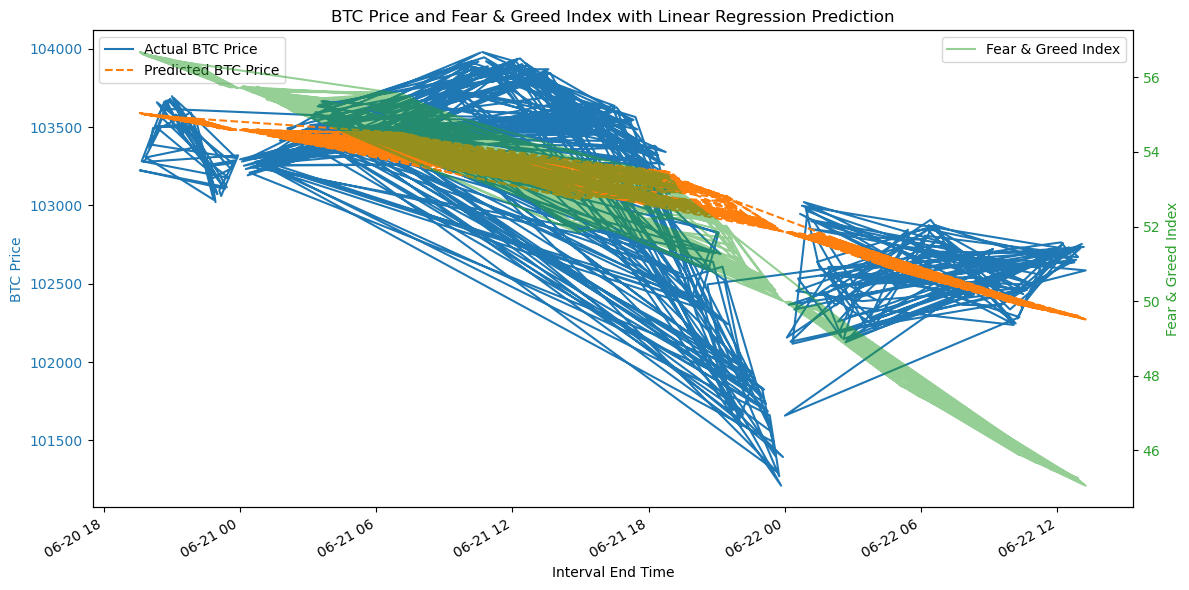

In [ ]:
# Plotting the results
interval_times = df.select('interval_end_time').to_numpy().flatten()
interval_times = np.array(interval_times, dtype='datetime64[ms]')
fear_greed = df.select('avg_actual_value').to_numpy().flatten()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Interval End Time')
ax1.set_ylabel('BTC Price', color=color)
ax1.plot(interval_times, y, label='Actual BTC Price', color='tab:blue')
ax1.plot(interval_times, y_pred, label='Predicted BTC Price', color='tab:orange', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Fear & Greed Index', color=color)
ax2.plot(interval_times, fear_greed, label='Fear & Greed Index', color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.autofmt_xdate()
plt.title('BTC Price and Fear & Greed Index with Linear Regression Prediction')
plt.tight_layout()
plt.show()
